<div dir="rtl">
<h4>نام: سارا رضایی منش</h4>
 
<h4>شماره دانشجویی: ۸۱۰۱۹۸۵۷۶</h4>
<h1 style="color: #cf133e; font-weight: 600;">تمرین کامپیوتری شماره چهار</h1>


---


<h3>هدف پروژه: پیاده سازی شبکه های عصبی با استفاده از کتابخانه TensorFlow و رابط کاربر سطح بالای Keras</h3>

<h5 style="line-height: 20pt;">توضیح کلی پروژه: در این پروژه باید با تمرین داده شبکه عصبی، مدلی طراحی کنیم که بتواند تصاویر داده های تست را دریافت کرده و تشخیص بدهد چه نوع حیوانی از چهار نوع raccoon, elk, raven و bald eagle داخل عکس است. برای طراحی شبکه عصبی باید از کتابخانه tensorflow و رابط کاربری سطح بالای Keras استفاده کنیم و معیار های متفاوتی که می توانند در دقت و سرعت همگرایی شبکه عصبی ما موثر باشند را امتحان کنیم. </h5>
</div>

# Preparations: Loading the dataset from drive and importing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/MyDrive/dataset.zip

the code above lists every file read from dataset.zip file. Outputs of this section were cleared as they were too long and added no further value to this project.

In [3]:
from tensorflow.keras import *
import tensorflow as tf
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from collections import Counter
import numpy as np
import pandas as pd
import tensorboard
import os
import cv2
import math
from google.colab.patches import cv2_imshow

# Phase 1: Preprocessing

## Part 1, 2, 5: Reading inputs with Keras

In [6]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.3
)

In [7]:
trainData =  dataGenerator.flow_from_directory(
    directory='./dataset/train',
    color_mode="grayscale",
    batch_size=32,
    class_mode = "categorical",
    target_size=(100, 100),
    shuffle=True,
    subset="training",
)

Found 1363 images belonging to 4 classes.


In [8]:
testData = dataGenerator.flow_from_directory (
    directory='./dataset/train',
    color_mode="grayscale",
    batch_size=32,
    class_mode = "categorical",
    target_size=(100, 100),
    shuffle=True,
    subset="validation",
)

Found 582 images belonging to 4 classes.


## Part 3: Plotting the number of images per each class

dict_items([(0, 156), (1, 138), (2, 152), (3, 136)]) 

dict_items([(0, 365), (1, 324), (2, 355), (3, 319)]) 



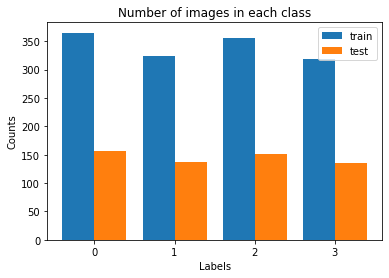

In [ ]:
def getImgPerClass(dg):
  counter_items = Counter(dg.classes).items()
  print(counter_items, '\n')
  return zip(*counter_items)

labels_test, values_test = getImgPerClass(testData)
labels_train, values_train = getImgPerClass(trainData)

indexes = np.arange(len(labels))
width = .4
plt.bar(indexes-0.2, values_train, .4, label = "train")
plt.bar(indexes+0.2, values_test, .4, label = "test")
plt.xticks(indexes, labels)
plt.ylabel('Counts')
plt.xlabel('Labels')
plt.title("Number of images in each class")
plt.legend()
plt.show()

## Part 4: Showing one image of each class

Below is displayed sample images from 4 classes: bald_eagle, elk, racoon and raven, resized to target size(100, 100) specified in dataGenerator.

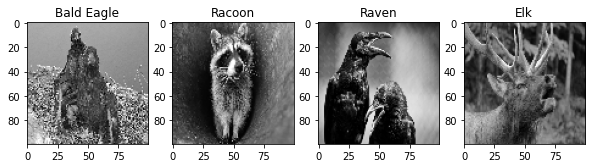

In [ ]:
images, labels = trainData.next()
fig, ax = plot_container = plt.subplots(1, 4)
fig.set_size_inches(15, 4)
class_names = {0:'Bald Eagle', 1:'Elk', 2:'Racoon', 3:'Raven'}

printed = list()
cursor = 0
for image, label in zip(images, labels):
    class_name = backend.argmax(label).numpy()
    if class_name not in printed:
        ax[cursor].imshow(image.reshape(100, 100), cmap='gray')
        ax[cursor].set_title(class_names[class_name])
        cursor += 1
        printed.append(class_name)

## Part 6: One Hot Encoding

The code below outputs the first five labels of the training section of the provided dataset. We can observe that the labels are automatically One Hot encoded by Keras dataGenerator.

In [ ]:
test_imgs1, test_labels1 = next(trainData)
print(test_labels1[0:5])
print(len(test_labels1))

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
32



# Phase 2: Building and Training a Neural Network

## Part 1: Building a Neural Network

The code below builds a neural network using TensorFlow library, with the following specifications:
1. optimizer = SGD
2. learning rate = 0.01
3. num of epochs = 10
4. batch size = 32
5. activation fuction of all the layers except the last one = relu
6. activation function of the last layer = softmax

In [ ]:
input = layers.Input(shape=(100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

In [ ]:
model = models.Model(inputs = input, outputs = output)

In [ ]:
model.compile(optimizer= optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 4800)              48004800  
                                                                 
 dense_1 (Dense)             (None, 3200)              15363200  
                                                                 
 dense_2 (Dense)             (None, 1600)              5121600   
                                                                 
 dense_3 (Dense)             (None, 4)                 6404      
                                                                 
Total params: 68,496,004
Trainable params: 68,496,004
Non-tra

### Parameters
<div dir="rtl">
<h5 style="line-height: 20pt;">نتایج تابع summary به صورت بالا می باشد.</h5>
<h5 style="line-height: 20pt;">در جدول چاپ شده، بخش Layer نشان دهنده نام لایه هایی است که به شبکه عصبی خود اضافه کرده ایم. همانطور که مشخص است برای هر لایه یک نام یکتا در نظر گرفته شده است. همچنین نوع هر لایه نیز در جلوی نام آن مشخص شده است. dense به معنای لایه ای است که همه نورون های های آن به همه نورون های لایه لایه قبل متصل هستند.</h5>
<h5 style="line-height: 20pt;">ستون بعدی output shape را نشان می دهد. یعنی نشان می دهد داده ها به چه صورت از هر لایه خارج می شوند. به عنوان مثال داده های پس از گذشتن از لایه flatten از حالت دو بعدی به آرایه یک بعدی در می ایند.</h5>
<h5 style="line-height: 20pt;">نام ستون بعد Param # می باشد. این ستون نشاندهنده تعداد پارامترهایی است که در هر لایه تمرین داده می شوند. این عدد در واقع مجموع تعداد یالهای ورودی به همه نورون های هر لایه است که می شود تعداد نورون های لایه قبل به اضافه یک در تعداد نورون های لایه فعلی. به اضافه یک به علت یک نورون اضافه برای بایاس است. به عنوان مثال برای لایه dense داریم: ۴۸۰۰*(۱۰۰۰+۱)</h5>
<h5 style="line-height: 20pt;">از آنجایی که چهار لایه آخر به صورت dense هستند همه نورون ها آنها به همه نورون های لایه قبل متصل است و محاسبات بالا با در نظر داشتن این موضوع انجام شده است.</h5>
<h5 style="line-height: 20pt;">در زیر جدول تعداد کلی پارامتر ها، تعداد پارامتر های قابل تمرین داده شدن و غیرقابل تمرین داده شدن آمده است که در این داده های داده شده هیچ داده غیرقابل تمرینی وجود ندارد. پس تعداد پارامتر های قابل تمرین داده شدند و کل پارامتر ها برابر با مجموع مقادیر ستون Param # است.</h5>

</div>

## Part 2: Training the model

In [4]:
def getAllLabels(testData):
  number_of_examples = len(testData.filenames)
  number_of_generator_calls = math.ceil(number_of_examples / (1.0 * testData.batch_size)) 
  test_labels = []
  for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(testData[i][1]))

  return test_labels

def undoOneHot(testData):
  test_labels = getAllLabels(testData)
  nz = tf.where(tf.not_equal(test_labels, tf.zeros_like(test_labels)))
  return tf.reshape(nz[:, -1], tf.shape(test_labels)[:-1])

def getTrainingReport(model, testData):
  testData1 = dataGenerator.flow_from_directory (
    directory='./dataset/train',
    color_mode="grayscale",
    batch_size=32,
    class_mode = "categorical",
    target_size=(100, 100),
    shuffle=False,
    subset="validation",
  )
  y_pred = model.predict(testData1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(classification_report(undoOneHot(testData1), y_pred_bool))

def plotMetric(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.title('model'+metric)
  plt.ylabel(metric)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
history = model.fit(trainData, validation_data = testData, epochs = 10)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
43/43 [==============================] - 67s 2s/step - loss: 0.4878 - accuracy: 0.8525 - val_loss: 0.8108 - val_accuracy: 0.7035
Epoch 2/10
43/43 [==============================] - 66s 2s/step - loss: 0.4853 - accuracy: 0.8430 - val_loss: 0.7417 - val_accuracy: 0.7395
Epoch 3/10
43/43 [==============================] - 65s 2s/step - loss: 0.4338 - accuracy: 0.8738 - val_loss: 0.8843 - val_accuracy: 0.6627
Epoch 4/10
43/43 [==============================] - 64s 1s/step - loss: 0.4245 - accuracy: 0.8672 - val_loss: 0.8248 - val_accuracy: 0.7167
Epoch 5/10
43/43 [==============================] - 64s 1s/step - loss: 0.4288 - accuracy: 0.8621 - val_loss: 0.9373 - val_accuracy: 0.6471
Epoch 6/10
43/43 [==============================] - 65s 2s/step - loss: 0.3422 - accuracy: 0.9127 - val_loss: 1.0463 - val_accuracy: 0.5762
Epoch 7/10
43/43 [==============================] - 65s 2s/step - loss: 0.4459 - accuracy: 0.8562 - val_loss: 0.7310 - val_accuracy: 0.7215
Epoch 8/10
43/43 [==

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


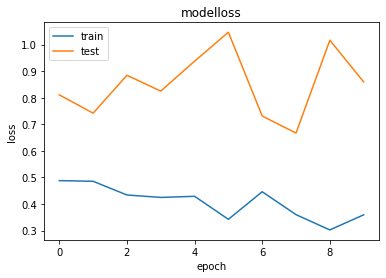

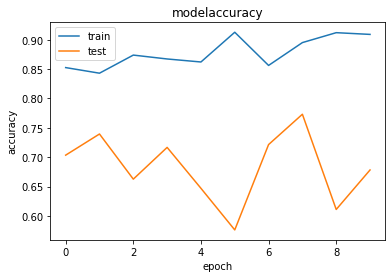

In [ ]:
plotMetric(history, 'loss')
plotMetric(history, 'accuracy')

In [ ]:
getTrainingReport(model, testData)

Found 248 images belonging to 4 classes.
              precision    recall  f1-score   support

           0       0.78      0.32      0.45        66
           1       0.74      0.76      0.75        59
           2       0.65      0.77      0.70        65
           3       0.59      0.84      0.70        58

    accuracy                           0.67       248
   macro avg       0.69      0.67      0.65       248
weighted avg       0.69      0.67      0.65       248



# Phase 3: Classification

## Model Builder Function

In [5]:
def makeModel(n1, n2, optimizer, loss, activation='relu', regularizer=None):

    input = layers.Input(shape=(100, 100, 1))
    output = layers.Flatten()(input)
    output = layers.Dense(n1, activation=activation, kernel_regularizer=regularizer)(output)
    output = layers.Dense(n2, activation=activation, kernel_regularizer=regularizer)(output)
    out = layers.Dense(4, activation="softmax")(output)

    model = models.Model(inputs=input, outputs=out) 
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])  

    return model

## Part 1: Optimizer

<div dir="rtl">
<h5 style="line-height: 20pt;">momentum روشی است که به بردار گرادیان شتاب بیشتری برای حرکت در جهت درست می دهد. </h5>
<h5 style="line-height: 20pt;">این روش به این صورت عمل می کند که در حین عملیات back tracking به جای اینکه تنها به بردار گرادیان توجه کند و تنها بر اساس آن وزن ها را آپدیت کند، ترکیب خطی از جهت قبلی حرکت و گرادیان فعلی را مد نظر قرار می دهد. به عنوان مثال اگر momentum برابر با 0.9 باشد، نود درصد از جهت قبلی و ده درصد از جهت جدید(بردار گرادیان) برای تنظیم و آپدتی کردن وزن ها انتخاب شده و در learning rate ضرب می شود. این عملیات باعث می شود که از منحرف شدن در مسیر به سمت نقطه بهینه global به علت نویز جلوگیری می کند و عملیات را بسیار سریعتر می کند.</h5>
</div>

### Momentum = .5

In [ ]:
nn_tm5 = makeModel(1024, 512, optimizer= optimizers.SGD(learning_rate=0.01, momentum=0.5), loss='categorical_crossentropy')  
history_tm5 = nn_tm5.fit(trainData, validation_data = testData, epochs = 10)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
43/43 [==============================] - 77s 2s/step - loss: 1.4265 - accuracy: 0.3558 - val_loss: 1.2196 - val_accuracy: 0.4634
Epoch 2/10
43/43 [==============================] - 54s 1s/step - loss: 1.2306 - accuracy: 0.4248 - val_loss: 1.2434 - val_accuracy: 0.4574
Epoch 3/10
43/43 [==============================] - 53s 1s/step - loss: 1.1482 - accuracy: 0.4784 - val_loss: 1.1358 - val_accuracy: 0.5078
Epoch 4/10
43/43 [==============================] - 53s 1s/step - loss: 1.0829 - accuracy: 0.5334 - val_loss: 1.1511 - val_accuracy: 0.5054
Epoch 5/10
43/43 [==============================] - 54s 1s/step - loss: 1.0153 - accuracy: 0.5715 - val_loss: 1.0573 - val_accuracy: 0.5522
Epoch 6/10
43/43 [==============================] - 54s 1s/step - loss: 1.0010 - accuracy: 0.5664 - val_loss: 1.2108 - val_accuracy: 0.4214
Epoch 7/10
43/43 [==============================] - 53s 1s/step - loss: 0.9669 - accuracy: 0.5957 - val_loss: 1.1327 - val_accuracy: 0.5414
Epoch 8/10
43/43 [==

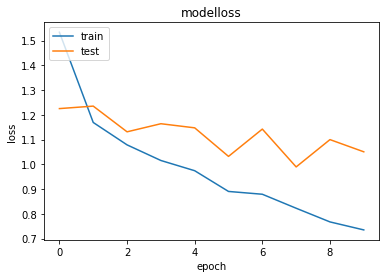

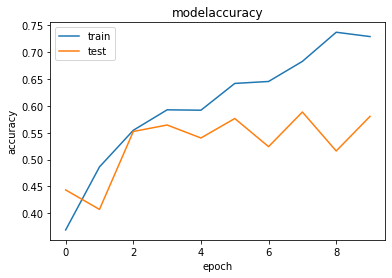

In [ ]:
plotMetric(history_tm5, 'loss')
plotMetric(history_tm5, 'accuracy')

In [ ]:
getTrainingReport(nn_tm5, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.62      0.63      0.62       156
           1       0.88      0.49      0.63       138
           2       0.53      0.88      0.66       152
           3       0.85      0.59      0.70       136

    accuracy                           0.65       582
   macro avg       0.72      0.65      0.65       582
weighted avg       0.71      0.65      0.65       582



### momentum = .8

In [ ]:
nn_tm8 = makeModel(1024, 512, optimizer= optimizers.SGD(learning_rate=0.01, momentum=0.8), loss='categorical_crossentropy')  
history_tm8 = nn_tm8.fit(trainData, validation_data = testData, epochs = 10)

Epoch 1/10
 4/43 [=>............................] - ETA: 22s - loss: 2.7663 - accuracy: 0.1719

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 78s 2s/step - loss: 1.5307 - accuracy: 0.3280 - val_loss: 1.2162 - val_accuracy: 0.4514
Epoch 2/10
43/43 [==============================] - 56s 1s/step - loss: 1.2206 - accuracy: 0.4189 - val_loss: 1.2324 - val_accuracy: 0.4466
Epoch 3/10
43/43 [==============================] - 56s 1s/step - loss: 1.1734 - accuracy: 0.4644 - val_loss: 1.1486 - val_accuracy: 0.5150
Epoch 4/10
43/43 [==============================] - 55s 1s/step - loss: 1.1145 - accuracy: 0.5070 - val_loss: 1.1601 - val_accuracy: 0.4970
Epoch 5/10
43/43 [==============================] - 55s 1s/step - loss: 1.1025 - accuracy: 0.5158 - val_loss: 1.2100 - val_accuracy: 0.4682
Epoch 6/10
43/43 [==============================] - 56s 1s/step - loss: 1.0602 - accuracy: 0.5253 - val_loss: 1.2418 - val_accuracy: 0.4358
Epoch 7/10
43/43 [==============================] - 56s 1s/step - loss: 0.9789 - accuracy: 0.5803 - val_loss: 1.0893 - val_accuracy: 0.5018
Epoch 8/10
43/43 [=============

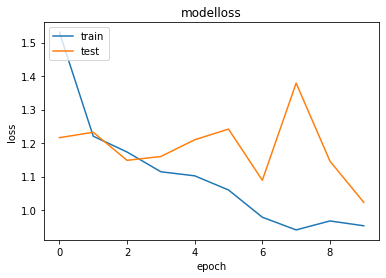

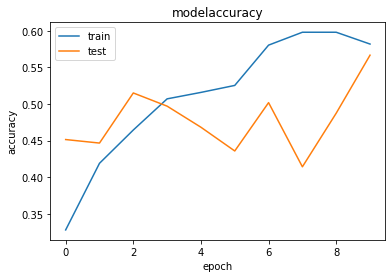

In [ ]:
plotMetric(history_tm8, 'loss')
plotMetric(history_tm8, 'accuracy')

In [ ]:
getTrainingReport(nn_tm8, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.66      0.46      0.54       156
           1       0.45      0.89      0.59       138
           2       0.79      0.45      0.58       152
           3       0.71      0.58      0.64       136

    accuracy                           0.59       582
   macro avg       0.65      0.60      0.59       582
weighted avg       0.66      0.59      0.59       582



#### Conclusions


<div dir="rtl">
<h5 style="line-height: 20pt;">مشاهده می شود که با افزایش momentum، مقدار loss با شیب تندتری کاهش پیدا میکند و درستی با سرعت بیشتری افزایش پیدا می کند. اما در هر مورد مقدار accuracy کاهش پیدا می کند. </h5>
<h5 style="line-height: 20pt;">همانطور که قبلا اشاره شد، momentum باعث می شود در هر قدم به مسیر قبلی حرکت نیز توجه داشته باشیم. در صورتی که momentum خیلی زیاد باشد، شتاب حرکت ما را به سمت مقصد بیش از حد مطلوب زیاد می کند و باعث می شود در هر بار انجام عملیات backtracking قدم هایمان بیش از اندازه بزرگ بشوند. و در نتیجه ممکن است هر دفعه از نقطه بهینه عبور کنیم و هیچ گاه همگرایی حاصل نشود </h5>
<h5 style="line-height: 20pt;">پس با استفاده از نتایج کد و تحلیل بالا می توان نتیجه گرفت momentum بالاتر همیشه به معنی accuracy بالاتر نیست.</h5>
</div>

### Using Adam Optimizer

In [ ]:
nn_adam = makeModel(1024, 512, optimizer=optimizers.Adam(), loss='categorical_crossentropy')  
history_adam = nn_adam.fit(trainData, validation_data = testData, epochs = 10)

Epoch 1/10
12/43 [=======>......................] - ETA: 26s - loss: 11.4772 - accuracy: 0.2682

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 43s 1s/step - loss: 4.8371 - accuracy: 0.3206 - val_loss: 1.5148 - val_accuracy: 0.3226
Epoch 2/10
43/43 [==============================] - 40s 928ms/step - loss: 1.3446 - accuracy: 0.3999 - val_loss: 1.5011 - val_accuracy: 0.3669
Epoch 3/10
43/43 [==============================] - 39s 924ms/step - loss: 1.2463 - accuracy: 0.4424 - val_loss: 1.2653 - val_accuracy: 0.4395
Epoch 4/10
43/43 [==============================] - 39s 914ms/step - loss: 1.1437 - accuracy: 0.5062 - val_loss: 1.2638 - val_accuracy: 0.4153
Epoch 5/10
43/43 [==============================] - 39s 916ms/step - loss: 1.1193 - accuracy: 0.5077 - val_loss: 1.1993 - val_accuracy: 0.4315
Epoch 6/10
43/43 [==============================] - 39s 914ms/step - loss: 1.0664 - accuracy: 0.5326 - val_loss: 1.2121 - val_accuracy: 0.5040
Epoch 7/10
43/43 [==============================] - 39s 898ms/step - loss: 1.0390 - accuracy: 0.5569 - val_loss: 1.2911 - val_accuracy: 0.4435
Epoch 8/10
43

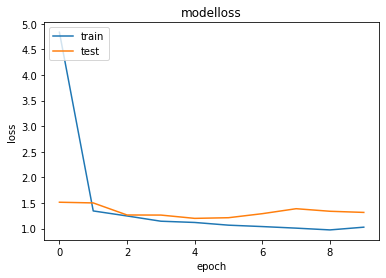

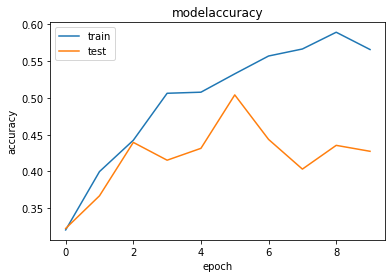

In [ ]:
plotMetric(history_adam, 'loss')
plotMetric(history_adam, 'accuracy')

In [ ]:
getTrainingReport(nn_adam, testData)

Found 248 images belonging to 4 classes.
              precision    recall  f1-score   support

           0       0.42      0.50      0.46        66
           1       0.73      0.14      0.23        59
           2       0.37      0.78      0.50        65
           3       0.70      0.24      0.36        58

    accuracy                           0.43       248
   macro avg       0.55      0.42      0.39       248
weighted avg       0.54      0.43      0.39       248



#### Conclusions

<div dir="rtl">
<h5 style="line-height: 20pt;"> با توجه به نمودار loss، بهینه ساز آدام بسیار سریعتر(منظور در تعداد epoch های کمتر است و نه در زمان کمتر) به حالت بهینه می رسد. همچنین برای الگوریتم آدام، نیاز به دستکاری مقادیر پیشفرض هایپرپارامتر ها کمتر است و درستی با همان مقادیر هم بالاست. در الگوریتم آدام به جای استفاده از یک لرنینگ برای آپدیت کردن همه وزن ها که در طول تمرین ثابت است، از لرنینگ ریت های متفاوت برای هر وزن استفاده می کنیم و این لرنینگ ریت ها می توانند در طول تمرین تغییر هم بکنند.</h5>
</div>


## Part 2: Epochs

### Epochs = 20

In [ ]:
nn_e20 = makeModel(1024, 512, optimizer=optimizers.Adam(), loss='categorical_crossentropy')  
history_e20 = nn_e20.fit(trainData, validation_data = testData, epochs = 20)

Epoch 1/20
21/43 [=============>................] - ETA: 17s - loss: 0.0260 - accuracy: 0.9970

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 52s 1s/step - loss: 0.0263 - accuracy: 0.9949 - val_loss: 1.1579 - val_accuracy: 0.7595
Epoch 2/20
43/43 [==============================] - 51s 1s/step - loss: 0.0160 - accuracy: 0.9978 - val_loss: 1.2224 - val_accuracy: 0.7612
Epoch 3/20
43/43 [==============================] - 50s 1s/step - loss: 0.0457 - accuracy: 0.9839 - val_loss: 1.2632 - val_accuracy: 0.7577
Epoch 4/20
43/43 [==============================] - 49s 1s/step - loss: 0.0174 - accuracy: 0.9978 - val_loss: 1.3049 - val_accuracy: 0.7629
Epoch 5/20
43/43 [==============================] - 49s 1s/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 1.3731 - val_accuracy: 0.7577
Epoch 6/20
43/43 [==============================] - 50s 1s/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 1.3136 - val_accuracy: 0.7629
Epoch 7/20
43/43 [==============================] - 50s 1s/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 1.2713 - val_accuracy: 0.7715
Epoch 8/20
43/43 [=============

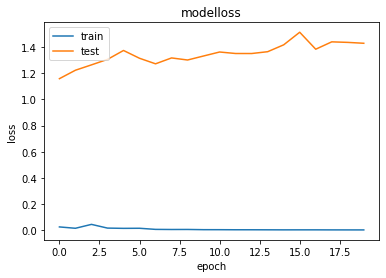

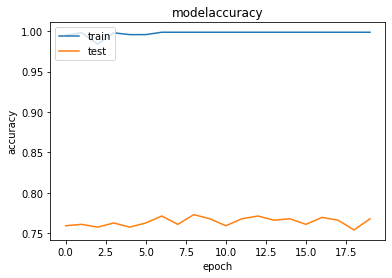

In [ ]:
plotMetric(history_e20, 'loss')
plotMetric(history_e20, 'accuracy')

In [ ]:
getTrainingReport(nn_adam, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.78      0.74      0.76       156
           1       0.79      0.78      0.79       138
           2       0.80      0.72      0.76       152
           3       0.72      0.83      0.77       136

    accuracy                           0.77       582
   macro avg       0.77      0.77      0.77       582
weighted avg       0.77      0.77      0.77       582



#### Conclusions

<div dir="rtl">
<h5 style="line-height: 20pt;">با توجه به  classification report مشاهده می شود که استفاده از ایپاک های بیشتر عموما منجر به افزایش دقت می شود اما از یک مرحله ای به بعد این افزایش یا بسیار جزئی است یا اصلا وجود ندارد. </h5>
</div>

### Epochs = 100(too large)

In [9]:
nn_e100 = makeModel(1024, 512, optimizer=optimizers.Adam(), loss='categorical_crossentropy')  
history_e100 = nn_e100.fit(trainData, validation_data = testData, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 58s 1s/step - loss: 4.9229 - accuracy: 0.2942 - val_loss: 1.3946 - val_accuracy: 0.3385
Epoch 2/100
43/43 [==============================] - 56s 1s/step - loss: 1.2581 - accuracy: 0.4153 - val_loss: 1.3493 - val_accuracy: 0.4175
Epoch 3/100
43/43 [==============================] - 56s 1s/step - loss: 1.2262 - accuracy: 0.4754 - val_loss: 1.1742 - val_accuracy: 0.4278
Epoch 4/100
43/43 [==============================] - 56s 1s/step - loss: 1.1327 - accuracy: 0.4872 - val_loss: 1.2566 - val_accuracy: 0.4485
Epoch 5/100
43/43 [==============================] - 56s 1s/step - loss: 1.1361 - accuracy: 0.5026 - val_loss: 1.0901 - val_accuracy: 0.5292
Epoch 6/100
43/43 [==============================] - 57s 1s/step - loss: 1.1092 - accuracy: 0.4982 - val_loss: 1.0796 - val_accuracy: 0.5241
Epoch 7/100
43/43 [==============================] - 56s 1s/step - loss: 1.0280 - accuracy: 0.5532 - val_loss: 1.3189 - val_accuracy: 0.4897
Epoch 8/100
43/43 [======

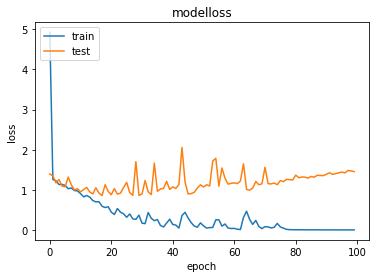

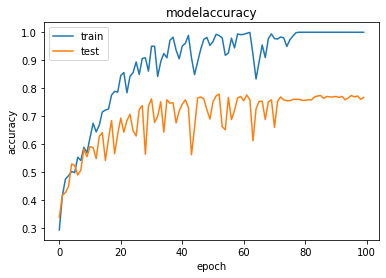

In [10]:
plotMetric(history_e100, 'loss')
plotMetric(history_e100, 'accuracy')

In [11]:
getTrainingReport(nn_e100, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       156
           1       0.79      0.80      0.80       138
           2       0.83      0.75      0.79       152
           3       0.73      0.80      0.76       136

    accuracy                           0.77       582
   macro avg       0.77      0.77      0.77       582
weighted avg       0.77      0.77      0.77       582



In [ ]:
nn_e80 = makeModel(1024, 512, optimizer=optimizers.Adam(), loss='categorical_crossentropy')  
history_e80 = nn_e80.fit(trainData, validation_data = testData, epochs = 80)

Epoch 1/80
 1/43 [..............................] - ETA: 1:08 - loss: 1.3757 - accuracy: 0.3438

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 58s 1s/step - loss: 4.1344 - accuracy: 0.2971 - val_loss: 1.5726 - val_accuracy: 0.3282
Epoch 2/80
43/43 [==============================] - 56s 1s/step - loss: 1.2699 - accuracy: 0.4160 - val_loss: 1.2410 - val_accuracy: 0.4296
Epoch 3/80
43/43 [==============================] - 56s 1s/step - loss: 1.1834 - accuracy: 0.4798 - val_loss: 1.1474 - val_accuracy: 0.4742
Epoch 4/80
43/43 [==============================] - 57s 1s/step - loss: 1.1448 - accuracy: 0.5011 - val_loss: 1.1767 - val_accuracy: 0.4777
Epoch 5/80
43/43 [==============================] - 57s 1s/step - loss: 1.1268 - accuracy: 0.4930 - val_loss: 1.3000 - val_accuracy: 0.4381
Epoch 6/80
43/43 [==============================] - 56s 1s/step - loss: 1.0188 - accuracy: 0.5642 - val_loss: 1.0358 - val_accuracy: 0.5378
Epoch 7/80
43/43 [==============================] - 56s 1s/step - loss: 1.0163 - accuracy: 0.5715 - val_loss: 1.0588 - val_accuracy: 0.5172
Epoch 8/80
43/43 [=============

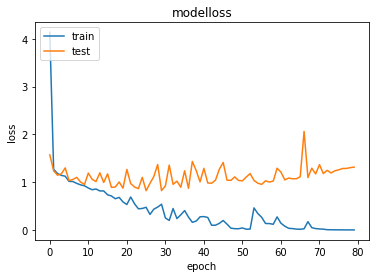

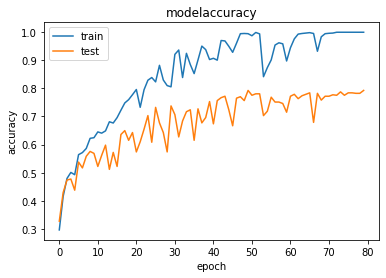

In [ ]:
plotMetric(history_e80, 'loss')
plotMetric(history_e80, 'accuracy')

In [ ]:
getTrainingReport(nn_e80, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.76      0.76      0.76       156
           1       0.82      0.84      0.83       138
           2       0.84      0.74      0.79       152
           3       0.75      0.84      0.79       136

    accuracy                           0.79       582
   macro avg       0.79      0.79      0.79       582
weighted avg       0.79      0.79      0.79       582



<div dir="rtl">
<h5 style="line-height: 20pt;">در نمودار های بالا مشاهده می شود که هنگام نزدیک شدن به ایپاک صدم مقدار loss برای validation data در حال افزایش است در حالیکه برای train data همواره دارد کاهش می یابد. مقدار اکیورسی هم تقریبا دیگر پیشرفتی ندارد و در عدد هایی که در هر ایپاک گزارش می شود مشخص است که کم کم رو به کاهش است و احتمالا اگر بیشتر ادامه بدهیم با شیب بیشتری افت پیدا کند. این یعنی مدل ما دارد به داده های آموزشی overfit می شود.</h5>
</div>

### Early Stopping to avoid overfitting

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

The “monitor” allows you to specify the performance measure to monitor in order to end training. In the code section below, we monitor val loss which is the losss value for our validation data. 

Based on the choice of performance measure, the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘). We want to minimize loss for validation data thus we have the 'min' value.

 Training will stop when the chosen performance measure stops improving.

In [ ]:
from keras.callbacks import EarlyStopping
nn_e80wES = makeModel(1024, 512, optimizer=optimizers.Adam(), loss='categorical_crossentropy')  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history_e80wES = nn_e80wES.fit(trainData, validation_data = testData, epochs = 80, callbacks=[es])

Epoch 1/80
 9/43 [=====>........................] - ETA: 27s - loss: 14.3471 - accuracy: 0.2708

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 61s 1s/step - loss: 4.6079 - accuracy: 0.3397 - val_loss: 1.2030 - val_accuracy: 0.4296
Epoch 2/80
43/43 [==============================] - 57s 1s/step - loss: 1.3193 - accuracy: 0.4035 - val_loss: 1.2622 - val_accuracy: 0.4777
Epoch 00002: early stopping


As observed above, the callback function stopped training because val_loss increased by approximatly 0.06 units, way before reaching the optimal value.
It is apparant that often, the first sign of no further improvement may not be the best time to stop training. This is because the model may coast into a plateau of no improvement or even get slightly worse before getting much better.

We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument.

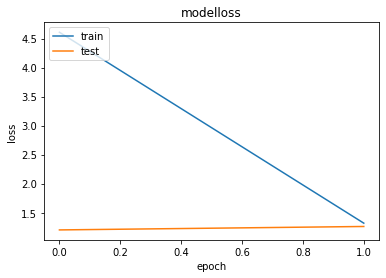

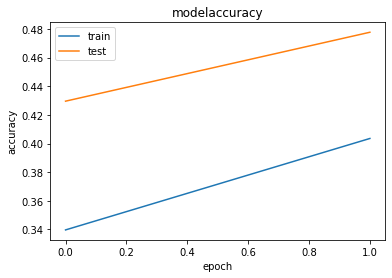

In [ ]:
plotMetric(history_e80wES, 'loss')
plotMetric(history_e80wES, 'accuracy')

In [ ]:
getTrainingReport(nn_e80wES, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.74      0.11      0.19       156
           1       0.44      0.72      0.55       138
           2       0.52      0.42      0.47       152
           3       0.46      0.72      0.56       136

    accuracy                           0.48       582
   macro avg       0.54      0.49      0.44       582
weighted avg       0.55      0.48      0.43       582



### Conceptual Qestions

<div dir="rtl">
<h5 style="line-height: 20pt;">۱) داده ها را به این علت در epoch های متعدد تمرین می دهیم که به صورت کلی می خواهیم مدل ساخته شده روی دیتای غیرآموزشی نیز دقت بالایی داشته باشد و از آنجایی که از وزن های اولیه رندوم شروع می کنیم، عموما باید بیشتر از یکبار داده های آموزشی را بررسی کنیم. همچنین حتی با هایپرپارامتر های مناسب بسیار عادی است که تعداد قدم هایی که احتیاج داریم تا به مینیمم محلی یا جهانی برسیم به تعداد نمونه های داده های آموزشی ما نباشد. پس باید از انجایی که پس از یکبار بررسی داده ها آموزشی رسیدیم، مجدد آپدیت را ادامه بدهیم تا به حالت بهینه وزن ها برسیم. که این کار به این معنی است که مجدد داده های آموزشی را در چند epoch دیگر بررسی کنیم.</h5>
<h5 style="line-height: 20pt;">در صورتی که تعداد دیتای ما نامحدود باشد یا به اندازه کافی بزرگ باشد(تعداد داده ها به اندازه یا بیشتر از قدم هایی باشد که باری رسیدن به نقطه بهینه احتیاج داریم.) و این داده ها از یک توزیع یکسان نمونه برداری شده باشند(در واقع iid باشند)، استفاده از یک epoch می تواند accuracy بسیار بالایی به ما بدهد و احتیاجی به چند epoch نیست.</h5>
</div>

<div dir="rtl">
<h5 style="line-height: 20pt;">۲) افزایش تعداد epoch ها همیشه سودمند نیست. چراکه ممکن است مشکل overfitting رخ بدهد. به این صورت که داده های تست را بیش از اندازه بررسی کنیم و بیش از اندازه وزن ها را آپدیت کنیم که باعث می شود نویز هایی که در داده ترین وجود دارد را نیز در ساخت مدل در نظر بگیریم.</h5>
<h5 style="line-height: 20pt;">برای مقابله با این مشکل دو راهکار وجود دارد:</h5>
<h5 style="line-height: 20pt;">۱) Early stopping: به این صورت عمل می کند که در ابتدا تعداد زیادی epoch در نظر می گیریم و یک performance measure انتخاب می کنیم تا توسط Keras همواره بررسی شود. در صورتی که این performance measure در یک epoch کمتر بشود، تمرین دادن مدل خاتمه می یابد. البته همیشه خاتمه دادن تمرین در اولین نقطه ای که performance measure مورد نظر بدتر شود منجر به نتایج بهتر نمی شود. چراکه در بعضی موارد ممکن است پس از این افت، یا پس از چند epoch با مقدار ثابت، بهبود قابل توجهی در performance measure رخ بدهد. می توانیم Early stopping را تا یک حد مشخص به تعویق بیاندازیم و اگر بازهم معیار مورد نظر ما تغییری نکرد، تمرین را خاتمه دهیم.</h5>
<h5 style="line-height: 20pt;">۲) Checkpointing: ممکن است مدلی که در انتهای تمرین به شیوه عادی و حتی به شیوه early stopping دریافت می کنیم، بهترین مقدار performance measure مورد نظر مارا نداشته باشد. برای رفع این مشکل از checkpointing استفاده می کنیم. این روش به این صورت عمل می کند که بهترین مدل بدست آمده در طول تمرین را ذخیره می کند و در هر ایپاک در صورتی که پرفورمنس مدل بهتر شده بود مدل ذخیره شده را آپدیت می کند. پس در انتها میتوانیم بهترین مدل بدست آمده در بین همه ایپاک ها را داشته باشیم. </h5>

</div>

## Part 3: Loss Function

### loss function = MSE

In [ ]:
nn_lfmse = makeModel(1024, 512, optimizer=optimizers.Adam(), loss=losses.mse)  
history_lfmse = nn_lfmse.fit(trainData, validation_data = testData, epochs = 20)

Epoch 1/20
15/43 [=========>....................] - ETA: 22s - loss: 0.3462 - accuracy: 0.2869

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 43s 972ms/step - loss: 0.3600 - accuracy: 0.2729 - val_loss: 0.3669 - val_accuracy: 0.2661
Epoch 2/20
43/43 [==============================] - 41s 942ms/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3669 - val_accuracy: 0.2661
Epoch 3/20
43/43 [==============================] - 41s 952ms/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3669 - val_accuracy: 0.2661
Epoch 4/20
43/43 [==============================] - 40s 923ms/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3669 - val_accuracy: 0.2661
Epoch 5/20
43/43 [==============================] - 40s 947ms/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3669 - val_accuracy: 0.2661
Epoch 6/20
43/43 [==============================] - 40s 944ms/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3669 - val_accuracy: 0.2661
Epoch 7/20
43/43 [==============================] - 40s 935ms/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3669 - val_accuracy: 0.2661
Epoch 8/20

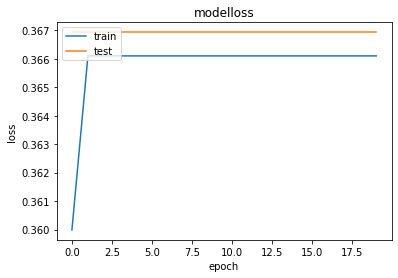

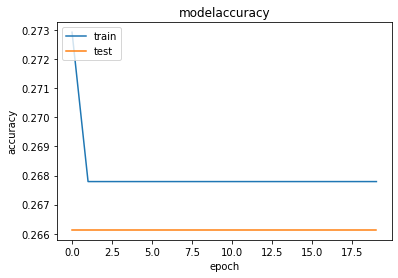

In [ ]:
plotMetric(history_lfmse, 'loss')
plotMetric(history_lfmse, 'accuracy')

In [ ]:
getTrainingReport(nn_lfmse, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.27      1.00      0.42       156
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00       152
           3       0.00      0.00      0.00       136

    accuracy                           0.27       582
   macro avg       0.07      0.25      0.11       582
weighted avg       0.07      0.27      0.11       582



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Conclusions:

<div dir="rtl">
<h5 style="line-height: 20pt;">مشاهده می شود که استفاده از mse باعث کاهش شدید دقت شده است.</h5>
</div>

### Conceptual Questions

 <div dir="rtl">
<h5 style="line-height: 20pt;">mse برای مساله های دسته بندی loss function مناسبی نیست چراکه هنگامیکه از mse استفاده می کنیم در واقع فرض کرده ایم که داده های ما توزیع نرمال یا گاوسی دارند. در حالیکه داده های ما در چهار دسته طبقه بندی می شوند و این توزیع وجود ندارد. همچنین mse برای مساله های دسته بندی یک تابع non-convex است. به این معنی که اگر یک مساله دسته بندی با استفاده از MSE loss function تمرین داده شود، هیچ تضمینی برای کمینه شدن loss وجود ندارد. این اتفاق به این دلیل می افتد که تابع MSE انتظار ورودی هایی در بازه بی نهایت تا منفی بی نهایت دارد در حالیکه مدل های مربوط به مسائل دسته بندی احتمال هایی در بازه صفر و یک را با استفاده از sigmoid یا توابع فعالسازی دیگر خروجی می دهند. این مساله باعث می شود حتی اگر یک مدل اصلا مدل خوبی نباشد، با معیار MSE بسیار مدل خوبی شناخته شود چون مقادیر بین صفر و یک از نظر آن مقادیر بسیار کوچک هستند. </h5>
<h5 style="line-height: 20pt;">به صورت کلی توابعی مانند cross entropy و softmax برای ارور توزیع چندجمله ای در نظر می گیرند و به همین علت برای مسائل دسته بندی مناسب هستند. اما تابع mse فرض می کند که ارور توزیع نرمال دارد و به همین علت برای مسائل regression مناسب است.</h5>
</div>

## Part 4: Regularization


### Regularization L2 = 0.0001

In [ ]:
nn_rl2 = makeModel(1024, 512, optimizer=optimizers.Adam(), regularizer=regularizers.l2(0.0001), loss='categorical_crossentropy')  
history_rl2 = nn_rl2.fit(trainData, validation_data = testData, epochs = 20)

Epoch 1/20
 4/43 [=>............................] - ETA: 32s - loss: 15.6261 - accuracy: 0.3125

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 55s 1s/step - loss: 5.1379 - accuracy: 0.3236 - val_loss: 1.6705 - val_accuracy: 0.2955
Epoch 2/20
43/43 [==============================] - 52s 1s/step - loss: 1.5276 - accuracy: 0.4138 - val_loss: 1.5748 - val_accuracy: 0.3625
Epoch 3/20
43/43 [==============================] - 52s 1s/step - loss: 1.4572 - accuracy: 0.4299 - val_loss: 1.4289 - val_accuracy: 0.4416
Epoch 4/20
43/43 [==============================] - 51s 1s/step - loss: 1.3892 - accuracy: 0.4710 - val_loss: 1.2983 - val_accuracy: 0.5326
Epoch 5/20
43/43 [==============================] - 50s 1s/step - loss: 1.2713 - accuracy: 0.5180 - val_loss: 1.2359 - val_accuracy: 0.5550
Epoch 6/20
43/43 [==============================] - 51s 1s/step - loss: 1.2252 - accuracy: 0.5407 - val_loss: 1.2822 - val_accuracy: 0.5120
Epoch 7/20
43/43 [==============================] - 51s 1s/step - loss: 1.2541 - accuracy: 0.5114 - val_loss: 1.3313 - val_accuracy: 0.4691
Epoch 8/20
43/43 [=============

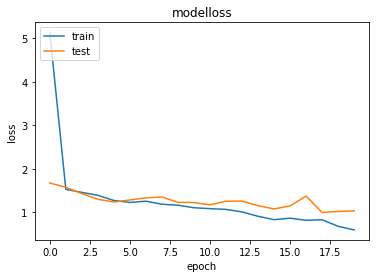

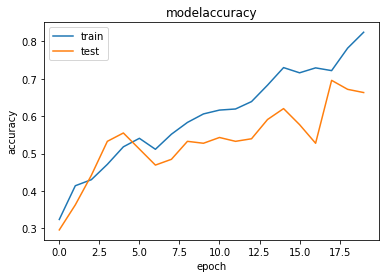

In [ ]:
plotMetric(history_rl2, 'loss')
plotMetric(history_rl2, 'accuracy')

In [ ]:
getTrainingReport(nn_rl2, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.53      0.76      0.62       156
           1       0.74      0.70      0.72       138
           2       0.70      0.71      0.71       152
           3       0.85      0.47      0.61       136

    accuracy                           0.66       582
   macro avg       0.71      0.66      0.66       582
weighted avg       0.70      0.66      0.66       582



#### Conclusions

 <div dir="rtl">
<h5 style="line-height: 20pt;">مشاهده می شود با اینکه accuracy نهایی پایینتر است اما تغییرات loss در ایپاک کمتر شده است و نمودار loss  هموار تر است. این اتفاق به این دلیل می افتد که l2 regularization منجر به جلوگیری از overfitting می شود به این صورت که مقدار وزن ها و بایاس هارا کوچک نگه می دارد که باعث می شود در هر ایپاک مقدار accuracy تغییرات کمتری نسبت به حالت قبل داشته باشد.  </h5>
<h5 style="line-height: 20pt;">همچنین مشاهده می شود که مقادیر loss و accuracy نسبت به حالت قبل بسیار به هم نزدیکتر هستند که نشان می دهد مدل به داده ی ترین overfit نشده است.</h5>
</div>

### Regilarization with Dropout

In [ ]:
def makeModelwDropout(n1, n2, dropout, loss, activation='relu', optimizer=optimizers.SGD(), regularizer=None):
    input = layers.Input(shape=(100, 100, 1))

    output = layers.Flatten()(input)
    output = layers.Dense(n1, activation=activation, kernel_regularizer=regularizer)(output)
    output = layers.Dropout(dropout)(output)
    output = layers.Dense(n2, activation=activation, kernel_regularizer=regularizer)(output)
    output = layers.Dropout(dropout)(output)
    output = layers.Dense(4, activation="softmax")(output)

    model = models.Model(inputs=input, outputs=output) 
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])  
    return model

In [ ]:
nn_wdo = makeModelwDropout(1024, 512, 0.1, loss='categorical_crossentropy', optimizer=optimizers.Adam())  
history_wdo = nn_wdo.fit(trainData, validation_data = testData, epochs = 20)

Epoch 1/20
 4/43 [=>............................] - ETA: 42s - loss: 17.9690 - accuracy: 0.2500

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 54s 1s/step - loss: 4.0908 - accuracy: 0.2920 - val_loss: 1.2494 - val_accuracy: 0.4038
Epoch 2/20
43/43 [==============================] - 52s 1s/step - loss: 1.4054 - accuracy: 0.3632 - val_loss: 1.2102 - val_accuracy: 0.4433
Epoch 3/20
43/43 [==============================] - 52s 1s/step - loss: 1.2634 - accuracy: 0.4101 - val_loss: 1.1903 - val_accuracy: 0.4708
Epoch 4/20
43/43 [==============================] - 52s 1s/step - loss: 1.1942 - accuracy: 0.4512 - val_loss: 1.1357 - val_accuracy: 0.4914
Epoch 5/20
43/43 [==============================] - 52s 1s/step - loss: 1.1585 - accuracy: 0.4813 - val_loss: 1.1760 - val_accuracy: 0.4674
Epoch 6/20
43/43 [==============================] - 52s 1s/step - loss: 1.1402 - accuracy: 0.4644 - val_loss: 1.2112 - val_accuracy: 0.4003
Epoch 7/20
43/43 [==============================] - 52s 1s/step - loss: 1.1356 - accuracy: 0.4798 - val_loss: 1.1274 - val_accuracy: 0.4502
Epoch 8/20
43/43 [=============

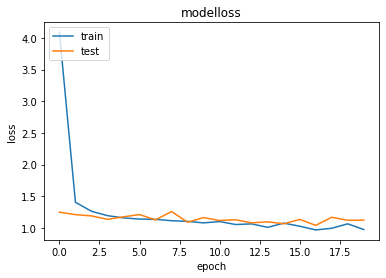

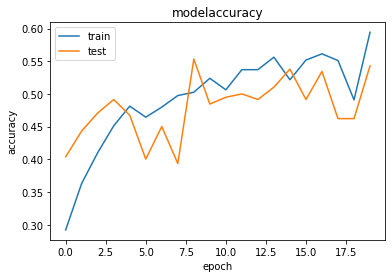

In [ ]:
plotMetric(history_wdo, 'loss')
plotMetric(history_wdo, 'accuracy')

In [ ]:
getTrainingReport(nn_wdo, testData)

Found 582 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.51      0.40      0.45       156
           1       0.54      0.71      0.61       138
           2       0.88      0.32      0.47       152
           3       0.48      0.79      0.60       136

    accuracy                           0.54       582
   macro avg       0.60      0.55      0.53       582
weighted avg       0.61      0.54      0.53       582



#### Conclusions

 <div dir="rtl">
<h5 style="line-height: 20pt;">همانند متد regularization قبلی مشاهده می شود که مقادیر loss و accuracy نسبت به حالت قبل بدون regilarization به هم نزدیکتر هستند که نشان می دهد مدل به داده ی ترین overfit نشده است.</h5>
<h5 style="line-height: 20pt;">در این حالت دوم فاصله داده های ترین و تست نسبت به حالت اول کمتر است که نشان می دهد این مدل بیشتر از overfitting جلوگیری می کند. البته اینکار باعث کند شدن فرآیند یادگیری نیز شده. به طوری که accuracy در این حالت نسبت به accuracy اولیه به شدت کاهش یافته است که یعنی بایاس زیاد شده و یکسری تغییرات صحیح هم که به مدل کمک می کنند برای جلوگیری از overfitting انجام نمی شوند.</h5>
</div>

# Phase 4: Testing

Just to be safe, let's first reread the dataset and split the training data. 

In [ ]:
AdataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0
)

AtestData = AdataGenerator.flow_from_directory (
    directory='./dataset/test',
    color_mode="grayscale",
    batch_size=32,
    class_mode = "categorical",
    target_size=(100, 100),
    shuffle=False,
    subset="training",
)

Found 833 images belonging to 4 classes.


In [ ]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = .3
)

validationData = dataGenerator.flow_from_directory (
    directory='./dataset/train',
    color_mode="grayscale",
    batch_size=32,
    class_mode = "categorical",
    target_size=(100, 100),
    subset="validation",
)

Found 582 images belonging to 4 classes.


In [ ]:
trainData = dataGenerator.flow_from_directory (
    directory='./dataset/train',
    color_mode="grayscale",
    batch_size=32,
    class_mode = "categorical",
    target_size=(100, 100),
    subset="training",
)

Found 1363 images belonging to 4 classes.


### The best model has the following properties:
1) optimizer = SGD with momentum = .5
<br/>
2) epochs = 20
<br/>
3) loss function = categorical crossentropy
<br/>
4) activation function = ReLU

In [ ]:
nn_best2 = makeModel(1024, 512, optimizer= optimizers.SGD(learning_rate=0.01, momentum=.5), loss='categorical_crossentropy') 
history_best2 = nn_best2.fit(trainData, validation_data = validationData, epochs = 20)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/20
43/43 [==============================] - 52s 1s/step - loss: 1.4346 - accuracy: 0.3375 - val_loss: 1.2476 - val_accuracy: 0.4227
Epoch 2/20
43/43 [==============================] - 51s 1s/step - loss: 1.2211 - accuracy: 0.4453 - val_loss: 1.2436 - val_accuracy: 0.4416
Epoch 3/20
43/43 [==============================] - 51s 1s/step - loss: 1.1435 - accuracy: 0.5011 - val_loss: 1.1385 - val_accuracy: 0.5086
Epoch 4/20
43/43 [==============================] - 55s 1s/step - loss: 1.0876 - accuracy: 0.5297 - val_loss: 1.0856 - val_accuracy: 0.5086
Epoch 5/20
43/43 [==============================] - 50s 1s/step - loss: 1.0699 - accuracy: 0.5451 - val_loss: 1.0215 - val_accuracy: 0.5704
Epoch 6/20
43/43 [==============================] - 50s 1s/step - loss: 1.0071 - accuracy: 0.5825 - val_loss: 1.0102 - val_accuracy: 0.5773
Epoch 7/20
43/43 [==============================] - 50s 1s/step - loss: 0.9864 - accuracy: 0.5884 - val_loss: 0.9788 - val_accuracy: 0.6100
Epoch 8/20
43/43 [==

In [ ]:
y_pred = nn_best2.predict(AtestData) 
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(undoOneHot(AtestData), y_pred_bool))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.58      0.72      0.64       223
           1       0.82      0.61      0.70       198
           2       0.70      0.70      0.70       217
           3       0.76      0.74      0.75       195

    accuracy                           0.69       833
   macro avg       0.71      0.69      0.70       833
weighted avg       0.71      0.69      0.70       833



f1-score for class no.0 = .64
<br/>
f1-score for class no.1 = .70
<br/>
f1-score for class no.2 = .70
<br/>
f1-score for class no.3 = .75
<br/>
accuracy = .69

### Showing 10 correctly predicted and 10 incorrectly predicted pictures

In [ ]:
corrects = []
incorrects = []

for i in range(int(np.ceil(len(AtestData.classes)/AtestData.batch_size))):
    images, labels = AtestData.next()
    labels = np.argmax(labels, axis=1)
    for j in range(len(labels)):
      if labels[j] == y_pred_bool[i*32+j]:
        corrects.append(images[j])
      else: 
        incorrects.append(images[j])

      if(len(corrects) == 30 and len(incorrects) == 30):
        break

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Correctly Predicted Images


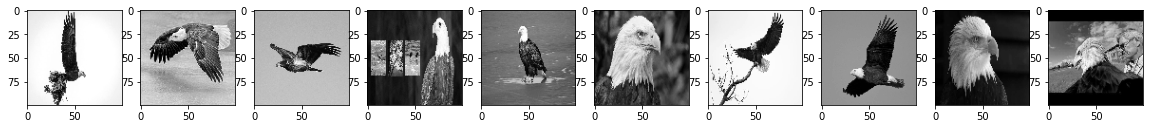

In [ ]:
fig, ax = plot_container = plt.subplots(1, 10)
fig.set_size_inches(20, 4)
print('Correctly Predicted Images')
for i in range(10):
  ax[i].imshow(corrects[i+10].reshape(100, 100), cmap='gray')

Incorrectly Predicted Images


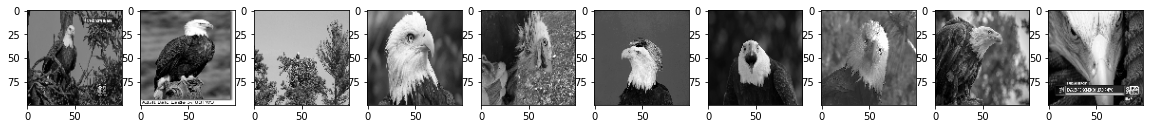

In [ ]:
print('Incorrectly Predicted Images')
fig, ax = plot_container = plt.subplots(1, 10)
fig.set_size_inches(20, 4)
for i in range(10):
  ax[i].imshow(incorrects[i].reshape(100, 100), cmap='gray')

 <div dir="rtl">
<h5 style="line-height: 20pt;">دسته دوم تصاویر، تصاویری هستند که اشتباه تشخیص داده شده اند. تصویر اول از فاصله دور گرفته شده و بک گراند واضحی دارد. تصویر دوم هم ممکن است مشکل از بک گراند باشد. تصویر سوم از فاصله خیلی دور گرفته شده و حتی با چشم هم نمی توان تشخیص داد چه حیوانی در تصویر است. تصویر چهارم تنها سر عقاب است و این ممکن است شبکه را دچار خطا کند چون احتمالا در داده های تست در تصاویر عقاب تعداد زیادی از پیکسل های میانی سیاه بوده اند که در این تصویر اینطور نیست. تصویر پنچم از زاویه بدی گرفته شده و بک گراند هم خیلی تیره و واضح است که ممکن است شیکه را دچار خطا کند. تصویر ششم و هفتم و هشتم و نهم شاید همه مشکل بک گراند تیره را داشته باشند و تصویر ششم هم ممکن است مانند تصویر چهارم چون بیشتر سر عقاب داخل تصویر است مدل را دچار اشتباه کرده باشد. در تصویر نهم عقاب بر خلاف عموم تصاویر در گوشه قرار دارد و در تصویر هشتم به نظر می رسد رنگ پرهای عقاب کنتراست معمول را ندارد. تصویر دهم هم کلا فقط سر عقاب از فاصله بسیار نزدیک است و روی آن نوشته هم دارد.</h5>
</div>

# Phase 5: Dimensionality Reduction

This new model has an extra layer before the last one with 2 neurons

In [ ]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(256, activation='relu')(output)
output = layers.Dense(2, activation='relu')(output)

optimizer= optimizers.SGD(learning_rate=0.01)
autoencoder = models.Model(inputs=input, outputs=output, name="encoder")
autoencoder.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 

out = layers.Dense(4, activation="softmax")(output)

model = models.Model(inputs=input, outputs=out) 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_39 (Dense)            (None, 1024)              10241024  
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dense_42 (Dense)            (None, 2)                 514       
                                                                 
 dense_43 (Dense)            (None, 4)                 12  

In [ ]:
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_39 (Dense)            (None, 1024)              10241024  
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dense_42 (Dense)            (None, 2)                 514       
                                                                 
Total params: 10,897,666
Trainable params: 10,897,666
Non-t

In [ ]:
history_model = model.fit(trainData, validation_data = validationData, epochs = 20)

Epoch 1/20
 7/43 [===>..........................] - ETA: 32s - loss: 0.8915 - accuracy: 0.6339

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 53s 1s/step - loss: 0.8802 - accuracy: 0.6383 - val_loss: 0.9730 - val_accuracy: 0.5773
Epoch 2/20
43/43 [==============================] - 51s 1s/step - loss: 0.8808 - accuracy: 0.6200 - val_loss: 0.9697 - val_accuracy: 0.5825
Epoch 3/20
43/43 [==============================] - 51s 1s/step - loss: 0.9144 - accuracy: 0.6266 - val_loss: 0.9796 - val_accuracy: 0.5911
Epoch 4/20
43/43 [==============================] - 51s 1s/step - loss: 1.0379 - accuracy: 0.5620 - val_loss: 1.0643 - val_accuracy: 0.5258
Epoch 5/20
43/43 [==============================] - 51s 1s/step - loss: 0.8309 - accuracy: 0.6779 - val_loss: 1.0513 - val_accuracy: 0.5704
Epoch 6/20
43/43 [==============================] - 50s 1s/step - loss: 0.9376 - accuracy: 0.6090 - val_loss: 1.5118 - val_accuracy: 0.4021
Epoch 7/20
43/43 [==============================] - 51s 1s/step - loss: 0.8694 - accuracy: 0.6354 - val_loss: 1.0006 - val_accuracy: 0.5722
Epoch 8/20
43/43 [=============

In [ ]:
example = autoencoder.predict(AtestData)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
labels = undoOneHot(AtestData)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


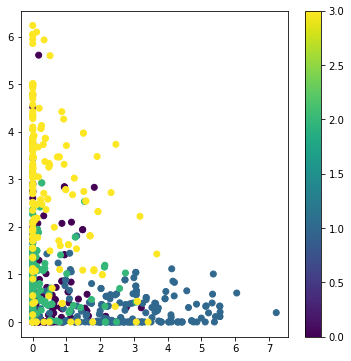

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(example[:, 0], example[:, 1], c=labels)
plt.colorbar()
plt.show()

### Conclusions

<div dir="rtl">
<h4>بعد کاهش یافته:</h4>
<h5 style="line-height: 20pt;">گاهی در داده های ما فیچر هایی هستند که از هم مستقل نیستند و همبستگی دارند. به عنوان مثال اگر یک پیسکل وسط تصویر کاملا سیاه باشد امکان اینکه پیکسل های کناری آن هم سیاه باشند به شدت بالا می رود. در این صورت به جای اینکه با استفاده از همه این پیکسل ها را به صورت جداگانه بررسی کنیم، می توانیم فیچر هایی که با هم به نوعی همبتگی دارند را تبدیل به فیچر کنیم و وارد شبکه کنیم. به این تبدیل encode کردن می گویند. همچنین در طی این فرآیند می توان فیچر هایی که به نظر می رسد در تشخیص تاثیر زیاد ندارند(مثل پیکسل های گوشه ای) را حذف کرد. که به کل این فرآیند کاهش تعداد فیچر ها که به منظور تسریع سرعت تمرین شبکه عصبی صورت می گیرد، Dimensionality reduction گفته می شود. برای اینکه بدانیم بعد داده ها را تا چه اندازه می توان کاهش داد می توانیم از یک decoder استفاده کنیم که تصویر را از تعداد پیکسل کم به تعداد پیکسل قبلی می برد و با فرض همبستگی پیسکل های دیگر را می سازد. می توان تصاویر یا داده های بدست آمده پس از فرآیند decode را با تصاویر قبلی مقایسه کرد و تشخیص داد که آیا داده ها با تصاویر جدید هنوز قابل استفاده هستند یا خیر.</h5>
<h4>تحلیل نتایج</h4>
{0:'Bald Eagle', 1:'Elk', 2:'Racoon', 3:'Raven'}
<h5 style="line-height: 20pt;">در مدل بالا ما تعداد فیچر ها یا همان بعد ها را برای ترسیم داده در لایه یکی مانده به آخر به دو بعد کاهش دادیم. نتایج حاصل از این دو بعد که به صورت دو نورون در لایه آخر قرار دارند به  صورت بالا می باشد. در scatter plot بالا هر رنگ نقطه نشاندهنده یک کلاس می باشد. cluster های رنگی نزدیک از لحاظ ساختاری به هم نزدیک تر هستند. یعنی اگر دو cluster از دو رنگ در شکل بالا به هم خیلی نزدیک باشند، احتمال اینکه به دو کلاسی که رنگ این دو cluster به آنها مربوط آنهاست اشتباها توسط مدل ما به جای هم گرفته شوند بسیار زیاد است. </h5>
<h5 style="line-height: 20pt;">با توجه به تحلیل های بالا می توان مشاهده کرد که cluster های زرد و سبز که به ترتیب نماینده کلاس های Raccoon و raven هستند خیلی هم نزدیک هستند و cluster های سبز و بنفش که نماینده کلاس های bald eagle و raven هستند هم خیلی به هم نزدیک هستند. پس مدل ما در تفکیک این کلاس ها از هم ممکن است دچار مشکل شود. این سختی در تفکیک به خصوص برای raven و bald eagle منطقی به نظر می رسد.</h5>
<h5 style="line-height: 20pt;">در این میان cluster آبی که نماینده کلاس elk هست به نظر می رسد به نسبت از باقی کلاسها دورتر باشد. یعنی تفکیک داده های دسته elk از باقی داده ها برای مدل راحت تر است که منطقی به نظر می رسد. چون elk کمترین شباهت را به دسته های دیگر دارد.</h5>
</div>

# Conlcusions

<div dir="rtl">

<h5 style="line-height: 20pt;">آشنایی با کتابخانه tensorflow کار طراحی شبکه عصبی و بررسی تاثیر معیار ها و هایپر پارامتر های مختلف را روی دقت و سرعت همگرایی را نسبت به فاز قبل خیلی آسانتر کرد. همچنین در این فاز توانستیم تاثیر هایپرپارامتر های جدیدی مانند momentum را ببنیم و با بهینه ساز ها و توابع loss جدید شبکه را تمرین دهیم و با استفاده از نتایج تحلیل کنیم که استفاده از چه شیوه ها و هایپر پارامتر هایی شبکه را به حالت بهینه می رساند. </h5>
</div>

# Comments

<div dir="rtl">

<h5 style="line-height: 20pt;">ضمن تشکر از زحمات طراحان، پروژه بسیار آموزنده ای بود. به نظر بنده اگر لینک های معرفی شده از سایت هایی غیر از سایت مرجع Keras بودند می توانستند مفید تر باشند. همچنین زمان اجرا برای هشتاد epoch برای بنده نزدیک دو ساعت شد و به نظرم از انجایی که نتیجه این حرکت مشخص بود، می شد از اجرای این بخش چشم پوشی شود.</h5>
</div>

# Reference Links


<pre>

Phase 1:
    1. https://keras.io/api/preprocessing/image/
    2. https://stackoverflow.com/questions/65632501/keras-flow-from-directory-how-to-get-number-of-samples-in-each-category?noredirect=1&lq=1
    3. https://stackoverflow.com/questions/19198920/using-counter-in-python-to-build-histogram
    4. https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
    5. https://stackoverflow.com/questions/70304645/how-does-the-one-hot-encoding-work-in-keras-image-data-generator

Phase 2:
    1. https://stackoverflow.com/questions/42092508/how-can-i-encode-labels-in-tensorflow
    2. https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
    3. https://stackoverflow.com/questions/48373685/keras-imagedatagenerator-how-to-get-all-labels-from-data
    4. https://stackoverflow.com/questions/42092508/how-can-i-encode-labels-in-tensorflow
    5. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    6. https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

Phase 3, 4:
    1. https://stackoverflow.com/questions/56482528/what-is-momentum-in-machine-learning
    2. https://stats.stackexchange.com/questions/383702/why-do-we-use-multiple-epochs-and-why-does-it-not-lead-to-over-fitting
    3. https://stats.stackexchange.com/questions/313278/no-change-in-accuracy-using-adam-optimizer-when-sgd-works-fine
    4. https://www.quora.com/Has-anyone-encountered-a-case-where-the-momentum-weight-updating-in-neural-networks-converged-too-soon-and-led-to-worse-results-than-a-simple-gradient-descent-would-have
    5. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
    6. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
    7. https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7
    8. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjyhpnm1Z_1AhXaiv0HHSvWBNgQFnoECA4QAw&url=https%3A%2F%2Fmachinelearningmastery.com%2Fhow-to-reduce-overfitting-with-dropout-regularization-in-keras
    9. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
    10. https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer
    11. https://stackoverflow.com/questions/36515202/in-which-cases-is-the-cross-entropy-preferred-over-the-mean-squared-error
    12. https://stats.stackexchange.com/questions/136809/should-i-use-epochs-1-when-training-data-is-unlimited
    13. https://blog.keras.io/building-autoencoders-in-keras.html
    14. Some youtube videos on autoencoders and dimesionality reduction

</pre>
